In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,083 kB/s)
debconf: unable to initi

In [1]:
import cv2
import numpy as np
import os
import pytesseract as pt
from google.colab.patches import cv2_imshow
import torch
from PIL import Image

In [300]:
img = cv2.imread('/content/drive/MyDrive/SOC/OCR2/yolov5/sample_images/Copy of sample1.jpg')

In [ ]:
cv2_imshow(img)

In [2]:
os.chdir('/content/drive/MyDrive/SOC/OCR2')

In [3]:
%cd yolov5/

/content/drive/MyDrive/SOC/OCR2/yolov5


In [4]:
# !python detect.py --weights runs/train/Model3/weights/best.pt --img 640 --conf 0.4 --source sample_images

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/Model3/weights/best.pt')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev

In [6]:
import matplotlib.pyplot as plt

In [7]:
def get_text(image_path, threshold):
  img = cv2.imread(image_path)
  Y, X,d = img.shape
  result = model(img)
  df = result.pandas().xyxy[0]
  df = df[df['confidence']>=threshold]
  df = df.drop(['class', 'name','confidence'], axis=1)
  # print(df.head())
  output = []
  i = 0
  # values = df.values.astype(int)
  for xmin,ymin,xmax,ymax in df.values.astype(int):
    xmin = max(0, xmin-3)
    ymin = max(0, ymin-3)
    xmax = min(X, xmax+3)
    ymax = min(Y, ymax+3)
    cv2.rectangle(img, (xmin,ymin),(xmax,ymax),(0,255,0),3)
    crop_img = img[ymin:ymax, xmin:xmax]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    crop_img = cv2.resize(crop_img, None, fx=4,fy=4, interpolation=cv2.INTER_CUBIC)

    text = pt.image_to_string(crop_img).strip()
    cv2.putText(img, text, (xmin,ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,255), 2)

    output.append(text)
  
  return output,img





In [18]:
path = '/content/drive/MyDrive/SOC/OCR2/yolov5/sample_images/sample5.jpeg'
text,image= get_text(path, 0.4)

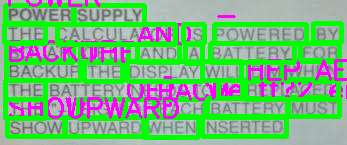

In [19]:
cv2_imshow(image)

In [17]:
print(text)

['']
